# Part 3

## 3.1 Setup and Data Preparation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import state_union
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
# Download the data
nltk.download('state_union')
# Create empty lists to store our text and years
texts = []
years = []
# Loop through files with corrected year extraction
for fileid in state_union.fileids():
    # Indent the try block to be within the for loop
    try:
        text = state_union.raw(fileid)
        # Extract just the year part before the hyphen
        year = int(fileid.split('-')[0])
        texts.append(text)
        years.append(year)
    except Exception as e:
        print(f"Error processing file {fileid}: {str(e)}")
# Create dataframe
speeches_df = pd.DataFrame({'text': texts, 'year': years})
print(f"Number of speeches: {len(speeches_df)}")
print(f"Year range: {speeches_df['year'].min()} to {speeches_df['year'].max()}")
print("\nFirst few rows:")
print(speeches_df.head())

[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.


Number of speeches: 65
Year range: 1945 to 2006

First few rows:
                                                text  year
0  PRESIDENT HARRY S. TRUMAN'S ADDRESS BEFORE A J...  1945
1  PRESIDENT HARRY S. TRUMAN'S MESSAGE TO THE CON...  1946
2  PRESIDENT HARRY S. TRUMAN'S ANNUAL MESSAGE TO ...  1947
3  PRESIDENT HARRY S. TRUMAN'S ANNUAL MESSAGE TO ...  1948
4  PRESIDENT HARRY S. TRUMAN'S ANNUAL MESSAGE TO ...  1949


In [6]:
# Create TF-IDF features
vectorizer = TfidfVectorizer(
max_features=5000, # Limit to top 5000 terms
min_df=2, # Term must appear in at least 2 speeches
max_df=0.95, # Term must appear in at most 95% of speeches
ngram_range=(1, 2) # Include both single words and pairs of words
)
# Create feature matrix
X = vectorizer.fit_transform(speeches_df['text'])
y = speeches_df['year']
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2,
random_state=42)
print("Feature matrix shape:", X.shape)
print("Number of speeches in training set:", X_train.shape[0])
print("Number of speeches in test set:", X_test.shape[0])
# Train Ridge regression model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
# Calculate error metrics
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print("\nModel Performance:")
print(f"Training RMSE: {train_rmse:.2f} years")
print(f"Test RMSE: {test_rmse:.2f} years")
# Look at most important features
feature_names = vectorizer.get_feature_names_out()
feature_importance = pd.DataFrame({
'term': feature_names,
'coefficient': model.coef_
})
print("\nTop terms indicating more recent speeches:")
print(feature_importance.nlargest(10, 'coefficient')[['term', 'coefficient']])
print("\nTop terms indicating older speeches:")
print(feature_importance.nsmallest(10, 'coefficient')[['term', 'coefficient']])

Feature matrix shape: (65, 5000)
Number of speeches in training set: 52
Number of speeches in test set: 13

Model Performance:
Training RMSE: 4.67 years
Test RMSE: 11.39 years

Top terms indicating more recent speeches:
           term  coefficient
414    applause    17.371654
4636         ve     6.778458
3320         re     6.137748
4494    tonight     5.415549
4744      we ve     4.700615
2131       iraq     4.409544
242   americans     4.343982
4736      we re     4.297928
828    children     4.102932
3910      thank     3.975980

Top terms indicating older speeches:
                 term  coefficient
3618            shall    -6.700277
2252            labor    -4.494757
3194       production    -3.880756
3203          program    -3.806903
3638           should    -3.700261
2500  million dollars    -3.673826
20               1947    -3.549236
1629             free    -3.339913
1437     expenditures    -3.323270
4600             upon    -3.265354


## 3.2 Training and Evaluating the Regression Model

In [7]:
# Create and train the model
model = Ridge(alpha=1.0) # alpha is the regularization strength
model.fit(X_train, y_train)
# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
# Calculate error metrics
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print(f"Training RMSE: {train_rmse:.2f} years")
print(f"Test RMSE: {test_rmse:.2f} years")

Training RMSE: 4.67 years
Test RMSE: 11.39 years


## 3.3 Interpreting the Regression Results

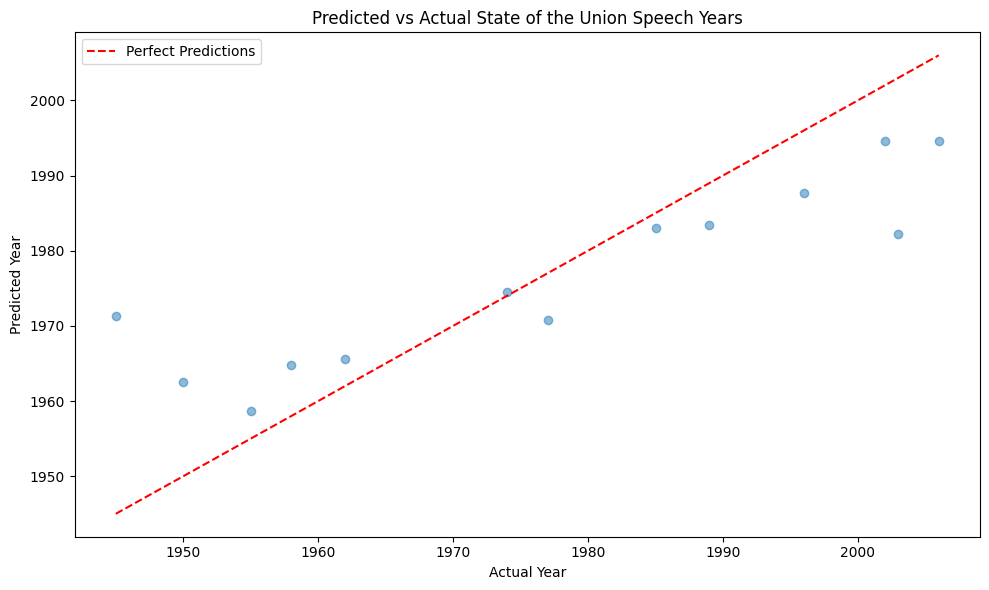


Top terms indicating more recent decisions:
           term  coefficient
414    applause    17.371654
4636         ve     6.778458
3320         re     6.137748
4494    tonight     5.415549
4744      we ve     4.700615
2131       iraq     4.409544
242   americans     4.343982
4736      we re     4.297928
828    children     4.102932
3910      thank     3.975980

Top terms indicating older decisions:
                 term  coefficient
3618            shall    -6.700277
2252            labor    -4.494757
3194       production    -3.880756
3203          program    -3.806903
3638           should    -3.700261
2500  million dollars    -3.673826
20               1947    -3.549236
1629             free    -3.339913
1437     expenditures    -3.323270
4600             upon    -3.265354


In [8]:
# Create scatter plot of predicted vs actual years
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
[y_test.min(), y_test.max()],
'r--', label='Perfect Predictions')
plt.xlabel('Actual Year')
plt.ylabel('Predicted Year')
plt.title('Predicted vs Actual State of the Union Speech Years')
plt.legend()
plt.tight_layout()
plt.show()
# Look at important features
feature_names = vectorizer.get_feature_names_out()
feature_importance = pd.DataFrame({
'term': feature_names,
'coefficient': model.coef_
})
print("\nTop terms indicating more recent decisions:")
print(feature_importance.nlargest(10, 'coefficient'))
print("\nTop terms indicating older decisions:")
print(feature_importance.nsmallest(10, 'coefficient'))

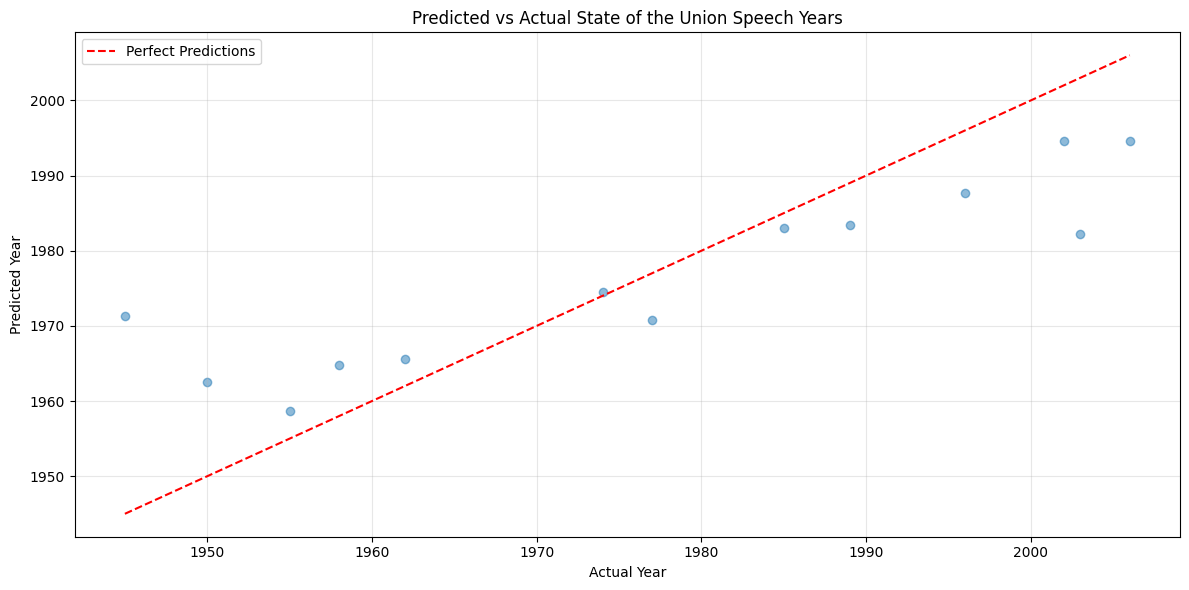

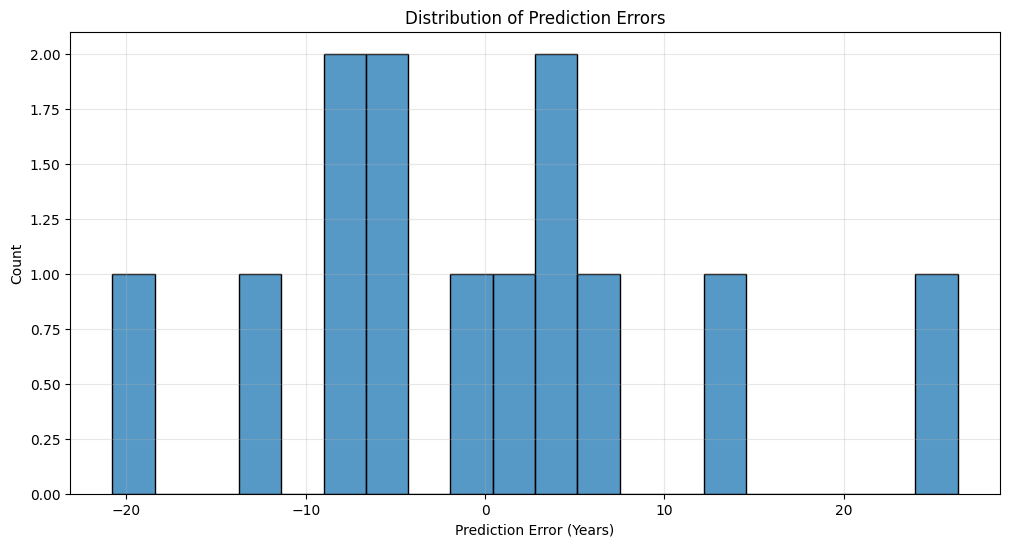

Detailed Regression Metrics:
Training RMSE: 4.67 years
Test RMSE: 11.39 years
Mean Absolute Error: 8.85 years
Median Absolute Error: 6.75 years
90% of predictions within: 19.14 years
Mean Absolute Error by Decade:
         mean  count   std
decade                    
1940.0  42.62      1   NaN
1950.0  25.59      3  6.38
1960.0    NaN      0   NaN
1970.0    NaN      0   NaN
1980.0    NaN      0   NaN
1990.0    NaN      0   NaN
2000.0    NaN      0   NaN
Most Time-Indicative Terms:
Terms indicating more recent speeches (largest positive coefficients):
              term  coefficient
414       applause       17.372
4636            ve        6.778
3320            re        6.138
4494       tonight        5.416
4744         we ve        4.701
2131          iraq        4.410
242      americans        4.344
4736         we re        4.298
828       children        4.103
3910         thank        3.976
3895    terrorists        3.758
801        century        3.481
38    21st century        3.

In [9]:
# Create scatter plot of predicted vs actual years
plt.figure(figsize=(12, 6))
plt.scatter(y_test, test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
[y_test.min(), y_test.max()],
'r--', label='Perfect Predictions')
plt.xlabel('Actual Year')
plt.ylabel('Predicted Year')
plt.title('Predicted vs Actual State of the Union Speech Years')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
# Calculate prediction errors
test_errors = test_pred - y_test
# Plot distribution of errors
plt.figure(figsize=(12, 6))
sns.histplot(test_errors, bins=20)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error (Years)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()
# Print detailed metrics
print("Detailed Regression Metrics:")
print(f"Training RMSE: {train_rmse:.2f} years")
print(f"Test RMSE: {test_rmse:.2f} years")
print(f"Mean Absolute Error: {np.mean(np.abs(test_errors)):.2f} years")
print(f"Median Absolute Error: {np.median(np.abs(test_errors)):.2f} years")
print(f"90% of predictions within: {np.percentile(np.abs(test_errors), 90):.2f} years")
# Analyze predictions by time period
y_test_series = pd.Series(y_test)
test_pred_series = pd.Series(test_pred)
errors_by_decade = pd.DataFrame({
'decade': (y_test_series // 10) * 10,
'absolute_error': np.abs(test_pred_series - y_test_series)
})
print("Mean Absolute Error by Decade:")
print(errors_by_decade.groupby('decade')['absolute_error'].agg(['mean', 'count', 'std']).round(2)) # Look at the most predictive terms for different time periods
print("Most Time-Indicative Terms:")
feature_importance = pd.DataFrame({
'term': vectorizer.get_feature_names_out(),
'coefficient': model.coef_
})
print("Terms indicating more recent speeches (largest positive coefficients):")
print(feature_importance.nlargest(15, 'coefficient')[['term', 'coefficient']].round(3))
print("Terms indicating older speeches (largest negative coefficients):")
print(feature_importance.nsmallest(15, 'coefficient')[['term', 'coefficient']].round(3))
# Calculate and display R-squared score
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, test_pred)
print("Model R-squared scores:")
print(f"Training R-squared: {r2_train:.3f}")
print(f"Test R-squared: {r2_test:.3f}")


# Part 4

## 4.1 Setup and Data Preparation

In [10]:
# Read the complaints data
complaints_df = pd.read_csv('/content/complaints.csv')
# Select relevant columns
complaints_df = complaints_df[['consumer_complaint_narrative', 'product']]
# Create binary classification target
most_common_product = complaints_df['product'].mode()[0]
complaints_df['label'] = (complaints_df['product'] == most_common_product).astype(int)
# Remove any rows with missing values
complaints_df = complaints_df.dropna()
print("Class distribution:")
print(complaints_df['label'].value_counts(normalize=True))

Class distribution:
label
0    0.52508
1    0.47492
Name: proportion, dtype: float64


## 4.2 Create Features for Classification

In [11]:
# Create TF-IDF features
vectorizer_class = TfidfVectorizer(
max_features=5000,
min_df=5,
max_df=0.7,
ngram_range=(1, 2)
)
# Transform the text data
X = vectorizer_class.fit_transform(complaints_df['consumer_complaint_narrative'])
y = complaints_df['label']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Feature matrix shape:", X.shape)

Feature matrix shape: (115990, 5000)


## 4.3 Training and Evaluating the Classification Model

In [12]:
# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
# Train Lasso model
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
# Calculate accuracies
nb_accuracy = accuracy_score(y_test, nb_pred)
lasso_accuracy = accuracy_score(y_test, lasso_pred)
print("Model Accuracies:")
print(f"Naive Bayes: {nb_accuracy:.3f}")
print(f"Lasso: {lasso_accuracy:.3f}")
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))
print("\nLasso Classification Report:")
print(classification_report(y_test, lasso_pred))

Model Accuracies:
Naive Bayes: 0.849
Lasso: 0.903

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     12192
           1       0.85      0.83      0.84     11006

    accuracy                           0.85     23198
   macro avg       0.85      0.85      0.85     23198
weighted avg       0.85      0.85      0.85     23198


Lasso Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     12192
           1       0.91      0.89      0.90     11006

    accuracy                           0.90     23198
   macro avg       0.90      0.90      0.90     23198
weighted avg       0.90      0.90      0.90     23198



## 4.4 Interpreting the Classification Results

In [13]:
# Get feature names
feature_names = vectorizer_class.get_feature_names_out()
# Analyze Lasso coefficients
lasso_importance = pd.DataFrame({
'term': feature_names,
'coefficient': lasso_model.coef_[0]
})
print("Top terms for positive class (Lasso model):")
print(lasso_importance.nlargest(10, 'coefficient'))
print("\nTop terms for negative class (Lasso model):")
print(lasso_importance.nsmallest(10, 'coefficient'))
# Analyze Naive Bayes feature probabilities
nb_importance = pd.DataFrame({
'term': feature_names,
'log_prob_ratio': nb_model.feature_log_prob_[1] - nb_model.feature_log_prob_[0]
})
print("\nMost distinctive terms (Naive Bayes model):")
print(nb_importance.nlargest(10, 'log_prob_ratio'))

Top terms for positive class (Lasso model):
              term  coefficient
1520      experian    21.892482
4479    transunion    20.225112
1472       equifax    18.034687
4787     with acct    15.699006
3349     relate to    12.517461
4250  this section    10.891509
4467         trans     8.975617
2076     inquiries     8.643425
2079       inquiry     8.340009
3414     reporting     8.018929

Top terms for negative class (Lasso model):
            term  coefficient
3633     shocked   -10.334215
800        bonus    -8.919002
1730       funds    -7.944014
4267  threatened    -6.662931
4321  to collect    -6.500949
3231        pslf    -6.326361
1782     greatly    -5.864454
1260        debt    -5.843028
1486      escrow    -5.732770
3144   portfolio    -5.729031

Most distinctive terms (Naive Bayes model):
                term  log_prob_ratio
472   and transunion        4.714675
2750      not relate        4.641708
4921    xxxx partial        4.626393
4904    xxxx inquiry        4.527771